In [ ]:
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display as disp

import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('house_price_area_only.csv')
disp(df.head())
disp(df.info())

,Unnamed: 0,price,area
0,0,598291,1188
1,1,1744259,3512
2,2,571669,1134
3,3,493675,1940
4,4,1101539,2208


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  6028 non-null   int64
 1   price       6028 non-null   int64
 2   area        6028 non-null   int64
dtypes: int64(3)
memory usage: 141.4 KB


None

In [2]:
# Just some ways to deal with the unnamed column

In [3]:
# 1) simply set the first columnas index if there as n index column in the csv

df = pd.read_csv('house_price_area_only.csv', index_col = 0)
disp(df.head(1))

,price,area
0,598291,1188


In [4]:
# Drop all unnamed columns
df = pd.read_csv('house_price_area_only.csv')
df.drop(df.columns[df.columns.str.contains('Unnamed')],axis = 1, inplace = True)
df.head(1)

,price,area
0,598291,1188


In [5]:
# Drop all unnamed columns ingnore upper or lower case
df = pd.read_csv('house_price_area_only.csv')
df.drop(df.columns[df.columns.str.contains('unnamed', case = False)],axis = 1, inplace = True)
df.head(1)

,price,area
0,598291,1188


In [6]:
# Pick a column by numerical index and drop it
df = pd.read_csv('house_price_area_only.csv')
df.drop(df.columns[0], axis=1, inplace = True)
df.head(1)

,price,area
0,598291,1188


In [7]:
# Lets just write ti another csv
df.to_csv('house_price_area_only_v2.csv', index = False)

In [8]:
# Now lets fit a line through the data using statsmodels module

In [9]:
# First we need to provide an intercet column and initialize it to 1
df['intercept'] = 1

# then we use the OLS method of statsmodels.api (OLS = ordinary least squares)
# sm.OLS(y, X) where X has two columns intercept column and the x values
linear_model = sm.OLS(df['price'], df[['intercept', 'area']])
result = linear_model.fit()
result.params

intercept    9587.887783
area          348.466355
dtype: float64

In [10]:
# fitted line is price = 9587.88 + 348.47*area

In [11]:
# alternate way of adding intercept

linear_model = sm.OLS(df['price'], sm.add_constant(df['area']))
result = linear_model.fit()
result.params

const    9587.887783
area      348.466355
dtype: float64

In [12]:
# visualizing the data

In [13]:
# add the predicted column to df

df['predicted'] = result.params[0] + result.params[1]*df['area']
disp(df.head())

df['price'].corr(df['area'])

# as correlation is 1 predicted are exactly same as the actual values 

,price,area,intercept,predicted
0,598291,1188,1,4.235659e+05
1,1744259,3512,1,1.233402e+06
2,571669,1134,1,4.047487e+05
3,493675,1940,1,6.856126e+05
4,1101539,2208,1,7.790016e+05


0.8234537182735616

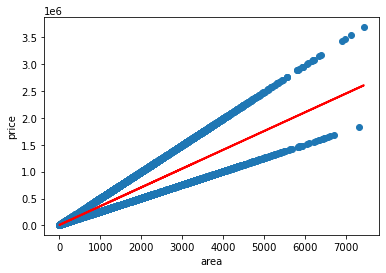

In [14]:
plt.scatter(df['area'], df['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.plot(df['area'], df['predicted'], linewidth = 2, color = 'red')

# TWO DIFFERENT NEIGHBORHOODS???

In [15]:
# Interpretting the parameters of the fitted model

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Fri, 05 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:16:41   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
disp(result.t_test([0,1]))
disp(result.t_test([1,0]))

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           348.4664      3.093    112.662      0.000     342.403     354.530

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04

In [18]:
disp(result.tvalues)
disp(result.pvalues)

const      1.255373
area     112.661907
dtype: float64

const    0.209392
area     0.000000
dtype: float64

In [19]:
# Lets do anexercise where we conduct the t-test using bootstrapping ourselves
'''
slopes = []
intercepts = []
for i in range(10000):
    bootsample = df.sample(df.shape[0], replace = True)
    linear_model = sm.OLS(bootsample['price'], sm.add_constant(bootsample['area']))
    result = linear_model.fit(cov_type="HC2")
    slopes.append(result.params[1])
    intercepts.append(result.params[0])
    
# establishing 95% confidence interval for slope and intercept values
conf_int_slopes = np.percentile(slopes, 2.5), np.percentile(slopes, 97.5)
conf_int_intercepts = np.percentile(intercepts, 2.5), np.percentile(intercepts, 97.5)
disp(conf_int_slopes)
disp(conf_int_intercepts)
'''

disp((348.46999999999895, 348.47000000000105))
disp((9587.87999999908, 9587.880000001))

(348.46999999999895, 348.47000000000105)

(9587.87999999908, 9587.880000001)

In [20]:
'''
std_slopes = np.std(slopes)
std_intercepts = np.std(intercepts)
disp(std_slopes)
disp(std_intercepts)
'''

disp(5.519244238866311e-13)
disp(5.38736649416062e-10)

5.519244238866311e-13

5.38736649416062e-10

In [21]:
# extrermely small std of sampling distribution observed while attempting bootstrapping on ols params

# WHY?? need to investigate more. for now lets continue

In [22]:
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

In [23]:
# carats example

df = pd.read_csv('carats.csv', header= None) # There are no column names so we put them manually
df.columns = ['carats', 'price']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carats  48 non-null     float64
 1   price   48 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 896.0 bytes


In [24]:
# alternate way of adding intercept

linear_model = sm.OLS(df['price'], sm.add_constant(df['carats']))
result = linear_model.fit()
result.params

const     -259.625907
carats    3721.024852
dtype: float64

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           6.75e-40
Time:                        19:16:42   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -259.6259     17.319    -14.991      0.000    -294.487    -224.765
carats      3721.0249     81.786     45.497      0.000    3556.398    3885.651
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# add the predicted column to df

df['predicted'] = result.params[0] + result.params[1]*df['carats']
disp(df.head())

df['price'].corr(df['carats'])

# as correlation is 1 predicted are exactly same as the actual values 

,carats,price,predicted
0,0.17,355,372.948318
1,0.16,328,335.738069
2,0.17,350,372.948318
3,0.18,325,410.158566
4,0.25,642,670.630306


0.9890706637981095

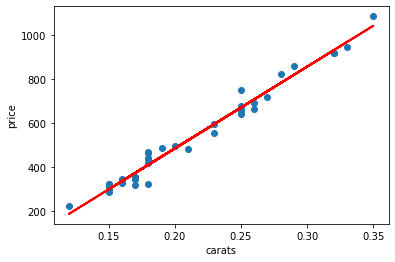

In [27]:
plt.scatter(df['carats'], df['price'])
plt.xlabel('carats')
plt.ylabel('price')
plt.plot(df['carats'], df['predicted'], linewidth = 2, color = 'red')

In [28]:
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

In [29]:
# Boston data example

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df.head()

,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


In [30]:
# alternate way of adding intercept

linear_model = sm.OLS(df['MedianHomePrice'], sm.add_constant(df['CrimePerCapita']))
result = linear_model.fit()
result.params

const             24.033106
CrimePerCapita    -0.415190
dtype: float64

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           1.17e-19
Time:                        19:16:44   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.0331      0.409     58.740      0.000      23.229      24.837
CrimePerCapita    -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# add the predicted column to df

df['predicted'] = result.params[0] + result.params[1]*df['CrimePerCapita']
disp(df.head())

df['MedianHomePrice'].corr(df['CrimePerCapita'])

# as correlation is 1 predicted are exactly same as the actual values 

,MedianHomePrice,CrimePerCapita,predicted
0,24.0,0.00632,24.030482
1,21.6,0.02731,24.021767
2,34.7,0.02729,24.021776
3,33.4,0.03237,24.019666
4,36.2,0.06905,24.004437


-0.38830460858681154

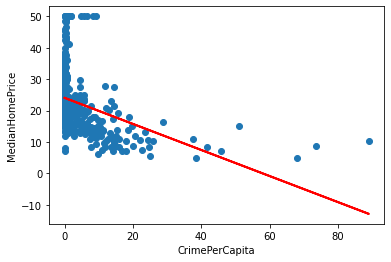

In [34]:
plt.scatter(df['CrimePerCapita'], df['MedianHomePrice'])
plt.xlabel('CrimePerCapita')
plt.ylabel('MedianHomePrice')
plt.plot(df['CrimePerCapita'], df['predicted'], linewidth = 2, color = 'red')